# importing important libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Import the dataset

In [2]:
train_df = pd.read_csv("titanic_train.csv")
train_df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [4]:
train_df.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived'],
      dtype='object')

In [5]:
train_df['cabin'].unique()

array([nan, 'C82', 'D15', 'C50', 'E33', 'B57 B59 B63 B66', 'E34', 'C83',
       'C125', 'B82 B84', 'B96 B98', 'B51 B53 B55', 'C132', 'C31', 'C68',
       'B94', 'F E46', 'C126', 'D34', 'B28', 'C65', 'B52 B54 B56', 'D17',
       'C86', 'C7', 'E25', 'E17', 'D56', 'A9', 'B26', 'C91', 'B5', 'D',
       'A23', 'C22 C26', 'C124', 'E63', 'B35', 'B18', 'C6', 'B49', 'B19',
       'G6', 'D35', 'C23 C25 C27', 'C62 C64', 'B73', 'E12', 'B41', 'A20',
       'B69', 'C78', 'A14', 'D26', 'C51', 'B79', 'E52', 'C49', 'C104',
       'B61', 'D43', 'D48', 'C123', 'A7', 'D47', 'D49', 'B80', 'A29',
       'F38', 'B58 B60', 'A34', 'D33', 'D20', 'F G63', 'T', 'A6',
       'C55 C57', 'B38', 'E49', 'F4', 'E121', 'C85', 'C87', 'B86', 'B102',
       'C111', 'D22', 'B22', 'B77', 'B50', 'B30', 'E36', 'F33', 'E60',
       'B39', 'C118', 'D21', 'F2', 'E39 E41', 'E101', 'A32', 'D38',
       'C101', 'C54', 'C106', 'C32', 'D36', 'E50', 'D40', 'C30', 'C52',
       'C130', 'C80', 'F G73', 'E10', 'B10', 'B24', 'C2', 'D28', '

In [6]:
test_df = pd.read_csv("titanic_test.csv")
test_df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,295,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C,B,NaN,"Haverford, PA"
1,1150,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S,NaN,NaN,NaN
2,89,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,NaN,NaN,"Montreal, PQ"
3,1063,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,NaN,S,NaN,NaN,"Finland Sudbury, ON"
4,1020,3,"Minkoff, Mr. Lazar",male,21.0,0,0,349211,7.8958,NaN,S,NaN,NaN,NaN


# Exploratory Data Analysis

# Missing Values

In [7]:
train_df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

<Axes: >

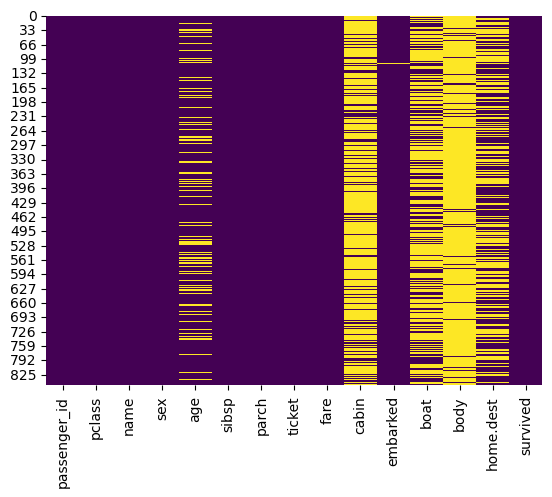

In [8]:
sns.heatmap(train_df.isnull(), cbar= False, cmap= 'viridis')

In [9]:
train_df['body'].isnull().sum()

777

In [10]:
train_df['boat'].isnull().sum()

542

In [11]:
train_df['age'].isnull().sum()


174

In [12]:
train_df['home.dest'].isnull().sum()

386

In [13]:
train_df['cabin'].isnull().sum()


659

<Axes: >

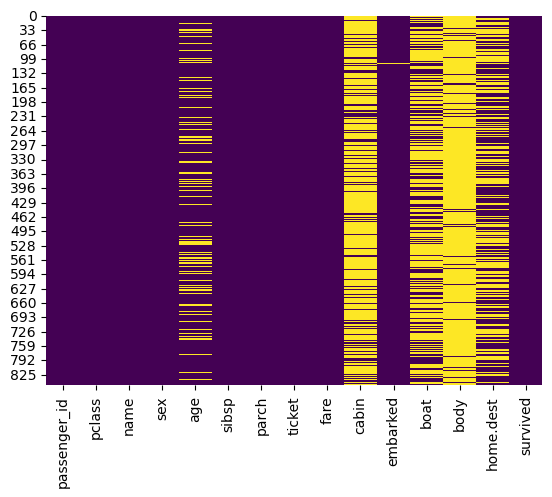

In [14]:
sns.heatmap(train_df.isnull(), cbar= False, cmap= 'viridis')

<Axes: xlabel='survived', ylabel='count'>

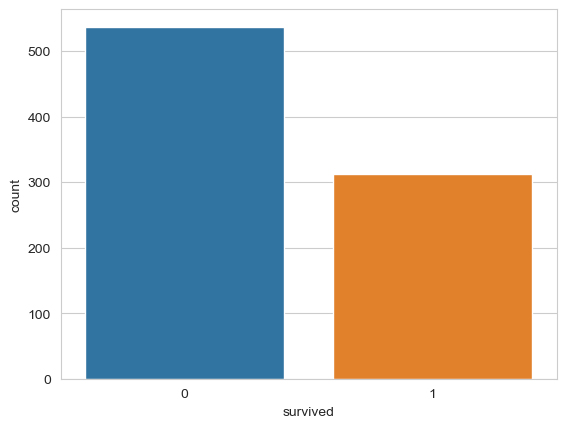

In [15]:
sns.set_style('whitegrid')
sns.countplot(x= 'survived', data = train_df)

<Axes: xlabel='survived', ylabel='count'>

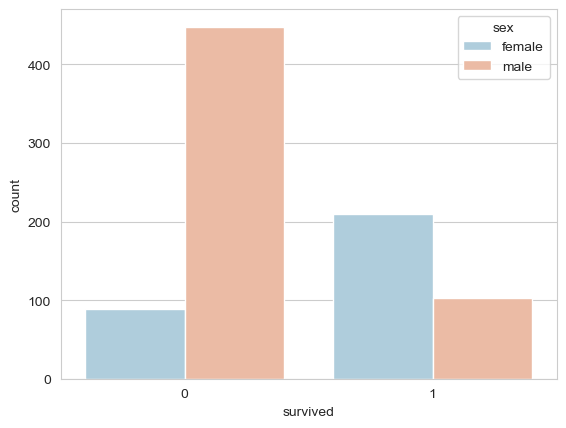

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='survived', hue= 'sex', data = train_df, palette = 'RdBu_r')

<Axes: xlabel='survived', ylabel='count'>

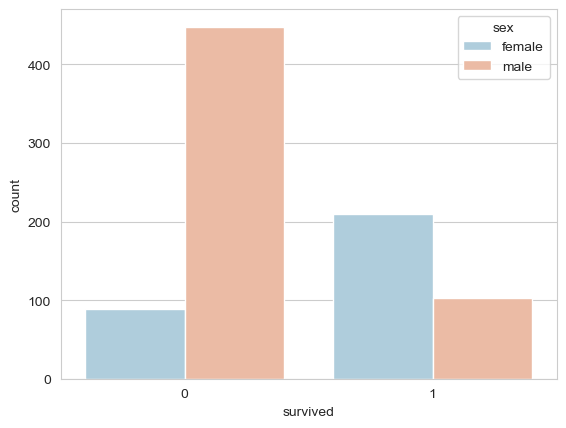

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='survived', hue= 'sex', data = train_df, palette = 'RdBu_r')

<Axes: xlabel='survived', ylabel='count'>

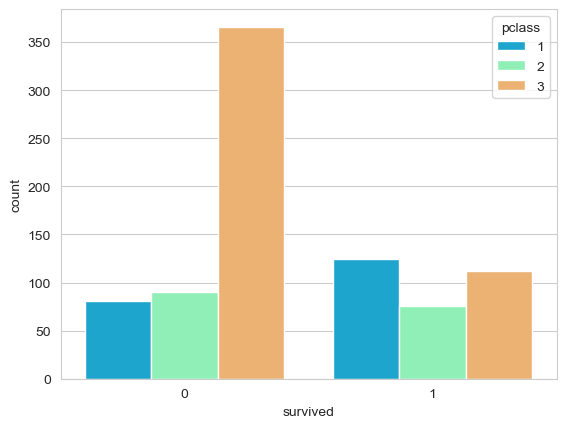

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='survived', hue= 'pclass', data = train_df, palette = 'rainbow')

<Axes: xlabel='age'>

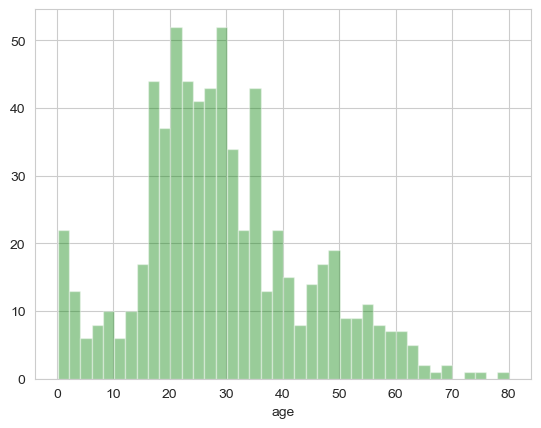

In [19]:
sns.distplot(train_df['age'], kde = False, color = 'green',bins = 40 )

<Axes: xlabel='sibsp', ylabel='count'>

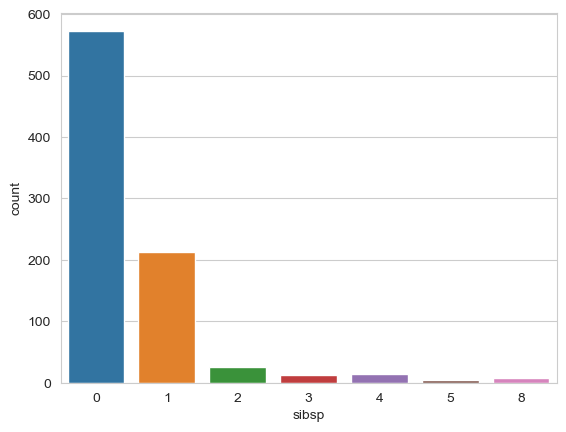

In [20]:
sns.countplot(x = 'sibsp', data = train_df)

<Axes: xlabel='survived', ylabel='count'>

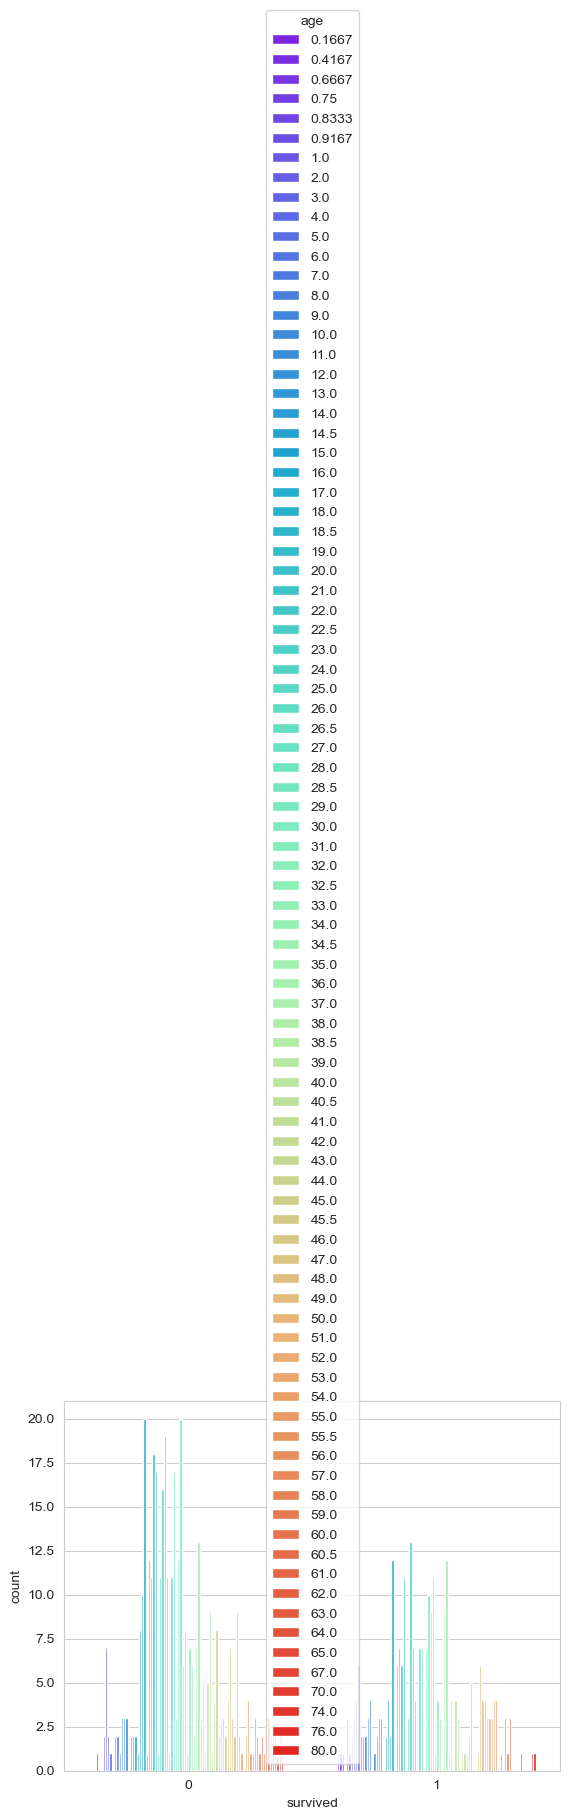

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='survived', hue= 'age', data = train_df, palette = 'rainbow')

# Data Cleaning

In [22]:
# drop body and cabin and home.dest column as more than 50% of data is missing in these column
train_df = train_df.drop(['body', 'boat', 'home.dest', 'cabin'], axis = 1)

In [23]:
train_df.head(2)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,0


<Axes: xlabel='pclass', ylabel='age'>

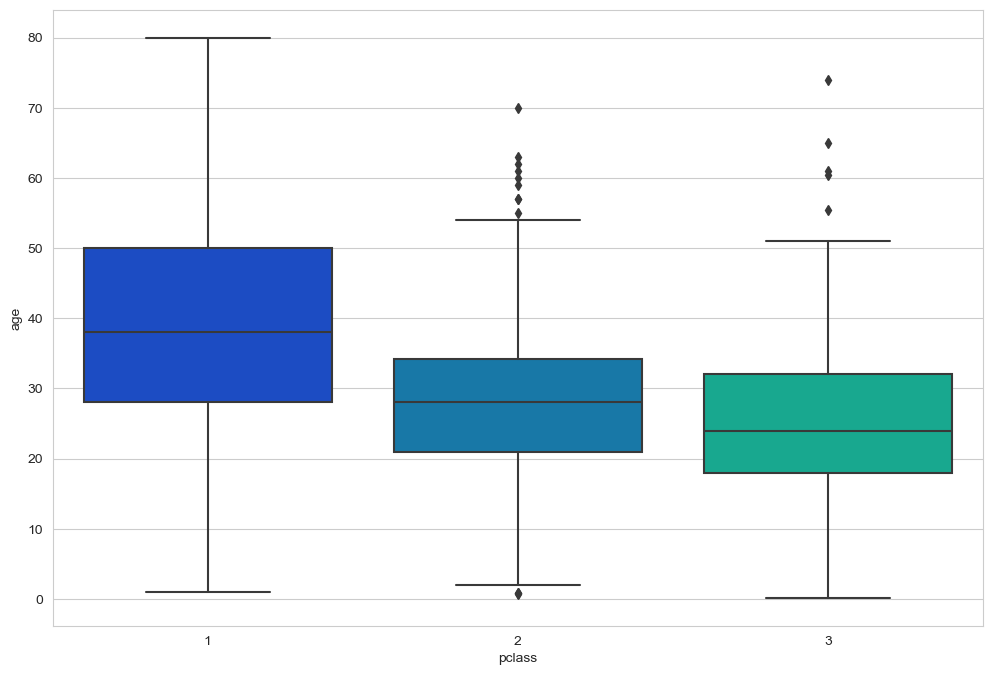

In [24]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'pclass', y = 'age', data = train_df, palette = 'winter')

# we can see the wealthier passengers in the higher class are older in age.so, we can  use these average age values to impute based on pclass for age

In [25]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1] 
    
    if pd.isnull(age):
        
        if pclass == 1:
            return 37
        
        elif pclass == 2:
            
            return 29
        
        else:
            return 24
        
    else:
        return age
        
        
    

In [26]:
train_df['age'] = train_df[['age', 'pclass']].apply(impute_age, axis = 1)

 now lets check the heatmap again

<Axes: >

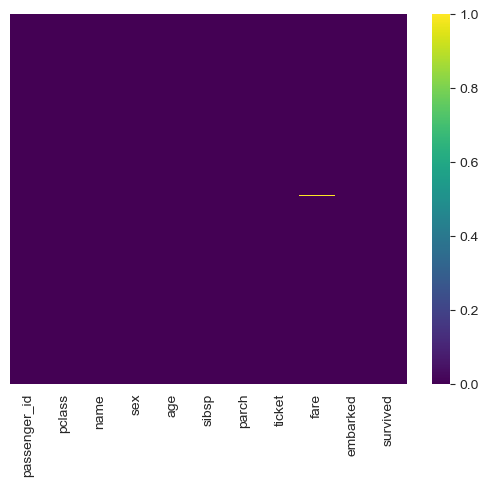

In [27]:
sns.heatmap(train_df.isnull(), yticklabels = False, cmap = 'viridis')

In [28]:
train_df['fare'].isnull().sum()

1

now replace this null value in fair column with mean value of the column

In [29]:
mean = train_df['fare'].mean()
mean

34.01270094228504

In [30]:
train_df['fare'].fillna(mean, inplace=True)

<Axes: >

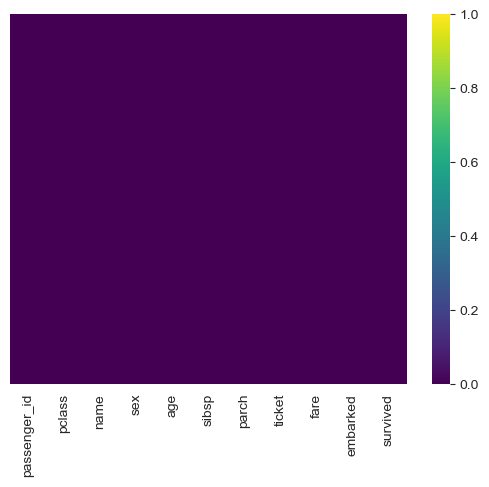

In [31]:
sns.heatmap(train_df.isnull(), yticklabels = False, cmap = 'viridis')

check again for the null values

In [32]:
train_df.isnull().sum()

passenger_id    0
pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
embarked        1
survived        0
dtype: int64

In [33]:
train_df['embarked'].isnull().sum()

1

In [34]:
train_df[train_df['embarked'].isnull()]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
109,168,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,1


In [35]:
train_df['embarked'].unique()

array(['Q', 'S', 'C', nan], dtype=object)

fill the nan value with most frequent value in the column

In [36]:
mode_embarked = train_df['embarked'].mode()[0]
train_df['embarked'].fillna(mode_embarked, inplace=True)


In [37]:
train_df['embarked'].isnull().sum()

0

# apply encoding to the categorical column to convert into numerical features

In [38]:
pd.get_dummies(train_df['embarked'], drop_first = True).head()

,Q,S
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [39]:
sex = pd.get_dummies(train_df['sex'], drop_first = True)
embark = pd.get_dummies(train_df['embarked'], drop_first = True)

drop all unimportant columns 

In [40]:
train_df.drop(['passenger_id','sex', 'embarked', 'name', 'ticket'], axis = 1 , inplace = True)

In [41]:
train_df.head()

,pclass,age,sibsp,parch,fare,survived
0,3,24.0,0,0,7.7333,1
1,3,38.0,0,0,8.6625,0
2,3,30.0,1,1,24.1500,0
3,2,54.0,1,3,23.0000,1
4,2,40.0,0,0,13.0000,0


In [42]:
train_df = pd.concat([train_df, sex,embark], axis = 1)

In [43]:
train_df.head()

,pclass,age,sibsp,parch,fare,survived,male,Q,S
0,3,24.0,0,0,7.7333,1,0,1,0
1,3,38.0,0,0,8.6625,0,1,0,1
2,3,30.0,1,1,24.1500,0,0,0,1
3,2,54.0,1,3,23.0000,1,0,0,1
4,2,40.0,0,0,13.0000,0,1,0,1


now the eda has been completed and the dataset is ready for our model